[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/115_pt2/115_pt2.ipynb)

# Pytorch 2.0 

[Pytorch 2.0](https://pytorch.org/) ya está aquí 🎉🎉🎉 Tras varios meses en fase beta, la segunda versión de nuestro framework favorito de deep learning ya está disponible. Si ya sabes trabajar con Pytorch, este post te servirá para refrescar algunos conocimientos básicos a la vez que aprenderás sobre las novedades de Pytorch 2.0. Por otro lado, si no sabes nada de Pytorch, este post te servirá como introducción para aprender a usarlo desde cero.

> En mi canal de Yotube tengo una [lista](https://www.youtube.com/watch?v=WL50sQVdQFg&list=PLkgbkukKg_Nrk7OtpwZEdVa10LijfpyZ1) de reproducción con todos los vídeos que he grabado sobre Pytorch. Te recomiendo que le eches un vistazo si quieres aprender más sobre este framework.

## ¿Qué es Pytorch?

`Pytorch` es un framework de `redes neuronales`, un conjunto de librerías y herramientas que nos hacen la vida más fácil a la hora de diseñar, entrenar y poner en producción nuestros modelos de `Deep Learning`. Una forma sencilla de entender qué es `Pytorch` es la siguiente:

$$ Pytorch = Numpy + Autograd + GPU $$

Quizás la característica más relevante de Pytorch es su facilidad de uso. Esto es debido a que sigue una interfaz muy similar a la de `NumPy`, por lo que si estás familiarizado con esta librería no debería costarte mucho usar `Pytorch` 😁.

> Si no conces `Numpy` te recomiendo que le eches un vistazo a este [post](https://www.sensiocoders.com/blog/007_numpy).

Sin embargo, la funcionalidad más importante que `Pytorch` ofrece es la conocidad como `autograd`, la cual nos proporciona la posibilidad de calcular derivadas de manera automática con respecto a cualquier `tensor`. Esto le da a Pytorch un gran potencial para diseñar redes neuronales complejas y entrenarlas utilizando algoritmos de descenso por gradiente sin tener que calcular todas estas derivadas manualmente. Para poder llevar a cabo estas operaciones, Pytorch va construyendo de manera dinámica un `grafo computacional`. Cada vez que aplicamos una operación sobre uno o varios tensores, éstos se añaden al grafo computacional junto a la operación en concreto. De esta manera, si queremos calcular la derivada de cualquier valor con respecto a cualquier tensor, simplemente tenemos que aplicar el algoritmo de `backpropagation` (que no es más que la regla de la cadena de la derivada) en el grafo.

Para que todo esto funcione de manera eficiente, Pytorch nos d ala posibilidad de ejecutar nuestro códigp en `GPU`s. Esto es posible gracias a que Pytorch está construido sobre `CUDA`, una librería de `C++` que nos permite programar en `GPU`. Por lo tanto, si tienes una `GPU` disponible, Pytorch la utilizará sin prácticamente ningún cambio en tu código para acelerar los cálculos. Si no tienes una GPU, puedes usar servicios como [Google Colab](https://colab.research.google.com/) o [Kaggle](https://www.kaggle.com/) para ejecutar tu código en la nube.

## Instalación

El primer paso para empezar a trabajar con `Pytorch` es instalarlo. Para ello, puedes seguir las instrucciones que aparecen en la [página oficial](https://pytorch.org/). En mi caso, voy a instalarlo usando `conda` en un ordenador con Linux y con soporte `GPU`:

```bash
conda install pytorch torchvision pytorch-cuda=11.7 -c pytorch -c nvidia
```

> Si no sabes como instalar `Python` o `Conda` en tu sistema, puedes aprender a hacerlo en este [post](https://www.sensiocoders.com/blog/001_python). También te recomiendo crear un entorno virtual para tu nueva instalación, así evitarás conflictos con otros proyectos que tengas en marcha. 

En el momento de escribir este post el comando anterior instalará la versión de `Pytorch` 2.0, en el momento en el que tu lo hagas instalará la versión más reciente hasta la fecha. Para instalar versiones diferentes vista https://pytorch.org/get-started/previous-versions/.

Una vez instalado ya podrás empezar a trabajar con `Pytorch` 🎉🎉🎉

In [1]:
import torch 

torch.__version__

'2.0.0.dev20230213+cu117'

Para saber si la `GPU` está disponible, puedes ejecutar

In [2]:
torch.cuda.is_available()

True

El siguiente comando te dará información sobre tu sistema (si no funciona deberás primero instalar los drivers de `NVIDIA`).

In [3]:
!nvidia-smi

Fri Mar 17 10:09:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.05    Driver Version: 525.85.05    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   55C    P0   106W / 350W |     29MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   

## Primeros pasos

Como comentabamos antes, `Pytorch` es muy similar a `Numpy`. Si bien el objeto principal en `Numpy` es el `array`, en `Pytorch` es el `tensor`. Un `tensor` es una matriz multidimensional con un tipo de datos concreto. Por ejemplo, podemos crear un `tensor` de 2x2 con ceros de la siguiente manera

In [4]:
x = torch.zeros(2, 2)
x

tensor([[0., 0.],
        [0., 0.]])

Puedes crear tensores con valores aleatorios

In [5]:
x = torch.randn(3)
x

tensor([-0.2063,  0.7455, -0.0131])

E incluso a partir de una lista de `Python`

In [6]:
x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

U otro array de `Numpy`

In [7]:
import numpy as np

a = np.array([[1, 2],[4, 5],[5, 6]])
x = torch.from_numpy(a)
x


tensor([[1, 2],
        [4, 5],
        [5, 6]])

Y como puedes esperar, prácticamente todos los conceptos que ya conocemos para trabajar con `NumPy` pueden aplicarse en `Pytorch`. Esto incluye operaciones aritméticas, indexado y troceado, iteración, vectorización y broadcasting.

In [8]:
# operaciones

x = torch.randn(3, 3)
y = torch.randn(3, 3)

x, y

(tensor([[ 1.6784,  1.7195, -0.5614],
         [ 1.0342, -0.5727, -0.4840],
         [ 0.4360,  1.4932,  0.3966]]),
 tensor([[ 1.0446,  0.3586, -0.9713],
         [-0.1943, -3.3726,  0.1241],
         [ 0.1605, -0.0124, -1.3009]]))

In [9]:
x + y

tensor([[ 2.7230,  2.0781, -1.5328],
        [ 0.8399, -3.9453, -0.3599],
        [ 0.5965,  1.4808, -0.9044]])

In [10]:
x - y

tensor([[ 0.6338,  1.3609,  0.4099],
        [ 1.2285,  2.7999, -0.6082],
        [ 0.2755,  1.5055,  1.6975]])

In [11]:
# indexado

# primera fila

x[0]

tensor([ 1.6784,  1.7195, -0.5614])

In [12]:
# primera fila, primera columna

x[0, 0]

tensor(1.6784)

In [13]:
# primera columna

x[0, :]

tensor([ 1.6784,  1.7195, -0.5614])

In [14]:
# troceado

x[:-1, 1:]

tensor([[ 1.7195, -0.5614],
        [-0.5727, -0.4840]])

Una funcionalidad importante del objeto `tensor` que utilizaremos muy a menudo es cambiar su forma. Esto lo conseguimos con la función `view`.

In [15]:
x.shape

torch.Size([3, 3])

In [16]:
# añadimos una dimensión extra

x.view(1, 3, 3).shape

torch.Size([1, 3, 3])

In [17]:
# estiramos en una sola dimensión

x.view(9).shape

torch.Size([9])

In [18]:
# usamos -1 para asignar todos los valores restantes a una dimensión

x.view(-1).shape

torch.Size([9])

Podemos transformar un `tensor` en un `array` con la función `numpy`.

In [19]:
x.numpy()

array([[ 1.6783874,  1.7194802, -0.5614443],
       [ 1.0342228, -0.5727211, -0.484026 ],
       [ 0.4360042,  1.4931623,  0.3965516]], dtype=float32)

Para aprender más sobre cómo funcionan estos tensores, puedes cosultar la [documentación](https://pytorch.org/docs/stable/tensors.html) y este [ejemplo](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

### Autograd

Vamos a ver un ejemplo de `autograd` en acción para el cálculo de derivadas automáticas. Para ello, consideremos el siguiente grafo computacional sencillo:

![](https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg)

Tenemos tres `tensores`, $x$, $y$ y $z$, los cuales combinamos con diferente operacion para calcular $g$. ¿Cómo podemos encontrar la derivada de $g$ con respecto a cada uno de los tensores a la entrada?. Para el caso de $z$ esto es sencillo:

$$ \frac{dg}{dz} = p = x + y$$

En el caso de $x$ y $y$ es un poco más complicado, ya que tenemos que aplicar la regla de la cadena de la derivada:

$$ \frac{dg}{dx} = \frac{dg}{dp} \frac{dp}{dx} = z $$
$$ \frac{dg}{dy} = \frac{dg}{dp} \frac{dp}{dy} = z $$

Si bien en este ejemplo sencillo lo hemos podido calcular a mano, imagina tener que hacer esto en redes neuronales con miles de millones de parámetros... imposible. `Autograd` nos permite calcular estas derivadas de manera automática. 

In [20]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
p = x + y

z = torch.tensor(3., requires_grad=True)
g = p * z

Para ello marcaremos los `tensores` de los cuales queremos calcular derivadas con la función `requires_grad`. Llamado a la función `backwerd` sobre el `tensor` de salida, `autograd` calculará las derivadas de manera automática y las almacenará en el atributo `grad` de cada `tensor`.

In [21]:
g.backward()

In [22]:
z.grad # x + y

tensor(3.)

In [23]:
x.grad # z

tensor(3.)

In [24]:
y.grad # z

tensor(3.)

Como puedes ver, el `grafo computacional` es una herramienta extraordinaria para diseñar `redes neuronales` de complejidad arbitraria. Con una simple función, gracias al algoritmo de `backpropagation`, podemos calcular todas las derivadas de manera sencilla (cada nodo que representa una operación solo necesita calcular su propia derivada de manera local) y optimizar el modelo con nuestro algoritmo de gradiente preferido.

Añadiendo `autograd` encima de `NumPy`, `Pytorch` nos ofrece todo lo que necesitamos para diseñar y entrenar `redes neuronales`. Puedes aprender más sobre `autograd` [aquí](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py). Sin embargo, si queremos entrenar redes muy grandes o utilizar datasets muy grandes (o ambas), el proceso de entrenamiento será muy lento. Es aquí donde entra en juego el último elemento que hace de `Pytorch` lo que es. 

### GPU

La última pieza que nos falta explorar es la posibilidad de ejecutar nuestro código en `GPU`. Para ello, solo tenemos que crear nuestros `tensores` en la `GPU` y ejecutar las operaciones de la misma manera. ¡Super sencillo!

In [25]:
x = torch.randn(3, 3, device="cuda")
y = torch.randn(3, 3, device="cuda")

x * y

tensor([[ 1.0285e-01, -1.0678e-01, -1.7388e-01],
        [-4.4772e-01,  2.6374e-01,  2.8962e-01],
        [ 3.0987e-01, -2.9449e-01, -4.0236e-04]], device='cuda:0')

Las siguientes son todas formas válidas de crear un `tensor` en la `GPU`

In [26]:
device = torch.device("cuda")           # device = "cuda" también sirve

x = torch.randn(3, 3, device=device)    # crea el tensor en la GPU

x = torch.randn(3, 3)
x = x.to(device)                        # mueve el tensor a la GPU (menos eficiente)
x = x.cuda()                            # mueve el tensor a la GPU (menos eficiente)    

device = "cuda:0"                       # selecciona la primera GPU, si hay más de una - "cuda:1", "cuda:2", etc.
x = torch.randn(3, 3, device=device)   
x

tensor([[-0.4112, -0.0476, -0.4308],
        [-0.2315, -1.1937,  0.0723],
        [ 1.5994, -0.0311,  0.1895]], device='cuda:0')

Puedes copiar un tensor de la `GPU` a la `CPU` con la función `cpu`

In [27]:
device = torch.device("cpu")

x = x.cpu()
x = x.to("cpu")
x = x.to(device)

El siguiente ejemplo ilustra porque es importante ejecutar nuestro código en `GPU`. En este caso, vamos a calcular el tiempo que tarda en ejecutarse la multiplicación de dos matrices grandes.

In [28]:
# en cpu

x = torch.randn(10000,10000)
y = torch.randn(10000,10000)

%time z = x*y

CPU times: user 90.3 ms, sys: 165 ms, total: 256 ms
Wall time: 27.9 ms


In [29]:
# en gpu

x = torch.randn(10000,10000).cuda()
y = torch.randn(10000,10000).cuda()

%time z = x*y

CPU times: user 0 ns, sys: 17.6 ms, total: 17.6 ms
Wall time: 17.6 ms


## Redes Neuronales

Pues ahora que ya conocemos los conceptos básicos de `Pytorch` vamos a ver como podemos diseñar redes neuronales. 

### Modelos secuenciales

La forma más sencilla de definir una `red neuronal` en `Pytorch` es utilizando la clase `Sequentail`. Esta clase nos permite definir una secuencia de capas, que se aplicarán de manera secuencial (las salidas de una capa serán la entrada de la siguiente). Vamos a definir un `Perceptrón Multicapa (MLP)`.

> Puedes aprender más sobre `Perceptrones Multicapa` en este [post](https://www.sensiocoders.com/blog/023_mlp_backprop).

In [30]:
D_in, H, D_out = 784, 100, 10

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

El modelo anterior es un `MLP` con 784 entradas, una capa oculta de 100 neuronas y 10 salidas. Para *ejectuar* el modelo, podemos llamarlo como de si una función se tratase, pasando como argumento el tensor con los *inputs*.

> La capa de tipo `Linear` espera un tensor de 2 dimensiones, en la cual la primera es la dimensión del `batch` que puedes ser arbitraria y la segunda tiene que coincidir con el número de neuronas especificado, en nuestro ejemplo 784 en la primera capa y 100 en la segunda.

In [31]:
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 10])

De la misma manera que hemos visto antes con los tensores, podemos enviar nuestro modelo a la `GPU` para acelerar las operaciones internas.

In [32]:
model.cuda()
x = torch.randn(64, 784).cuda()

outputs = model(x)
outputs.shape, outputs.device

(torch.Size([64, 10]), device(type='cuda', index=0))

### Modelos personalizados

Si bien los modelos secuenciales son útiles para definir redes neuronales sencillas, en la práctica casi siempre necesitaremos definir redes más complejas. Para ello, podemos definir nuestras propias clases que hereden de la clase `Module` de `Pytorch`. Esta clase nos permite definir modelos de manera más flexible, ya que nos permite diseñar la lógica de ejecución del modelo a nuestro gusto.

In [33]:
class Model(torch.nn.Module):
    
    # constructor
    def __init__(self, D_in=784, H=100, D_out=10):
        
        # llamamos al constructor de la clase madre
        super(Model, self).__init__()
        
        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)
        
    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

En primer lugar, necesitamos definir una nueva clase que herede de la clase `torch.nn.Module`. Esta clase madre aportará toda la funcionalidad esencial que necesita una `red neuronal` (soporte GPU, iterar por sus parámeteros, etc). Luego, en esta clase necesitamos definir mínimos dos funciones: 

- `init`: en el constructor llamaremos al constructor de la clase madre y después definiremos todas las capas que querramos usar en la red.
- `forward`: en esta función definimos toda la lógica que aplicaremos desde que recibimos los inputs hasta que devolvemos los outputs.

En el ejemplo anterior simplemente hemos replicado la misma red (puedes conseguir el mismo efecto usando la clase `Sequential`).

In [34]:
model = Model(784, 100, 10)
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 10])

### Compilando modelos

Una de las novedades que `Pytorch 2.0` introduce es la posibilidad de `compilar` el modelo. Esto le permite *analizar* nuestro modelo para su optimización, consiguiendo así un mejor rendimiento durante el entrenamiento.

In [35]:
model_compiled = torch.compile(model) 

Puedes aprender más sobre esta funcionalidad [aquí](https://pytorch.org/get-started/pytorch-2.0/).

## Datasets

A la hora de entrenar una red neuronal, necesitamos un conjunto de datos sobre el que entrenar. Para ello, `Pytorch` nos ofrece funcionalidad para su creación e iteración de manera optimizada. Vamos a ver un ejemplo usando el conjunto de datos `MNIST`, que podemos descargar usando `Scikit-Learn`.

In [40]:
from sklearn.datasets import fetch_openml
import numpy as np


# mnist = fetch_openml('mnist_784', version=1)
# X, Y = mnist["data"].values.astype(float).reshape(-1, 28, 28) / 255., mnist["target"].values.astype(int)
# np.savez_compressed("mnist.npz", X=X, y=Y)

# la descarga puede tardar un rato, así que te recomiendo comentar las líneas anteriores después
# de ejecutarlas la primera vez y descomentar las siguientes para cargar los datos desde el disco

X, Y = np.load("mnist.npz")["X"], np.load("mnist.npz")["y"]

X.shape, Y.shape

((70000, 28, 28), (70000,))

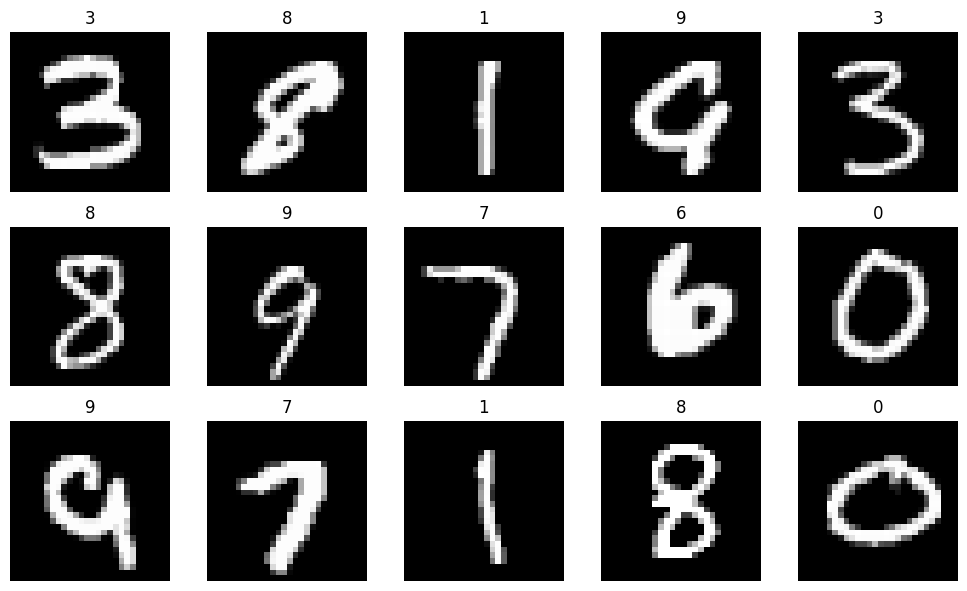

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        plt.imshow(X[ix], cmap='gray')
        plt.axis("off")
        plt.title(y[ix])
plt.tight_layout()
plt.show()

Este dataset consiste en imágenes de dígitos manuscritos (del 0 al 9) con su correspondiente etiqueta, un dataset muy útil para aprender a entrenar redes neuronales, en concreto para clasificación de imágenes.

### El `DataLoader`

El `DataLoader` es un objeto que nos permite iterar nuestro dataset en `batches` de manera eficiente. Podemos pasarle como argumento cualquier iterador, desde una lista de `Python` hasta un `array` de `NumPy` o un `tensor` de `Pytorch`.

In [43]:
dataloader = torch.utils.data.DataLoader(X, batch_size=100)

for batch in dataloader:
    print(batch.shape)
    break

torch.Size([100, 28, 28])


Tiene varias opciones interesantes que nos permitirán mejorar la eficiencia de nuestro entrenamiento.

In [47]:
dataloader = torch.utils.data.DataLoader(
    X,                      # datos                 
    batch_size=100,         # tamaño del batch, número de imágenes por iteración
    shuffle=True,           # barajamos los datos antes de cada epoch
    num_workers=4,          # número de procesos que se lanzan para cargar los datos (número de cores de la CPU para carga en paralelo)
    pin_memory=True,        # si tenemos una GPU, los datos se cargan en la memoria de la GPU
    collate_fn=None,        # función para combinar los datos de cada batch
)

### El `Dataset` 

Si bien el `dataloader` es capaz de trabajar con cualquier iterador, `Pytorch` nos ofrece una clase base para crear nuestros propios datasets

In [67]:
class Dataset(torch.utils.data.Dataset):
    # constructor
    def __init__(self, X, Y):
        self.X = torch.tensor(X).float()
        self.Y = torch.tensor(Y).long()
    # cantidad de muestras en el dataset
    def __len__(self):
        return len(self.X)
    # devolvemos el elemento `ix` del dataset
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]
    # opcionalmente, podemos definir una función para generar un batch
    def collate_fn(self, batch):
        x, y = [], []
        for _x, _y in batch:
            x.append(_x)
            y.append(_y)
        return torch.stack(x).view(len(batch), -1), torch.stack(y) # estiramos las imágenes en una dimensión

Para ello crearemos una nueva clase que hereda de `torch.utils.data.Dataset`, en la cual definiremos estas tres funciones: 

- `__init__`: el constructor
- `__len__`: devuelve el número de muestras en el dataset
- `__getitem__`: devuelve una muestra en concreto del dataset

Cada vez que nuestro `dataloader` necesite una nueva muestra, llamará a la función `__getitem__` pasándole el índice de la muestra que necesita. Aquí podremos definir cualquier lógica de carga y procesado de datos (por ejemplo, leer imágenes y aplicar transformaciones).

In [70]:
dataset = Dataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100)

for batch in dataloader:
    x, y = batch
    print(x.shape, y.shape)
    break

torch.Size([100, 28, 28]) torch.Size([100])


In [72]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, collate_fn=dataset.collate_fn)

for batch in dataloader:
    x, y = batch
    print(x.shape, y.shape)
    break

torch.Size([100, 784]) torch.Size([100])


## Entrenamiento

Ha llegado el momento de ver cómo podemos entrenar nuestro modelo con el dataset que hemos creado. Empezaremos con un ejemplo mínimo, en el que entrenaremos nuestro `MLP` con el dataset `MNIST`.

![](https://media.licdn.com/dms/image/C4D12AQFKRQOp_aXz0g/article-cover_image-shrink_600_2000/0/1577211633664?e=2147483647&v=beta&t=pZ5TdXalXICIqPXTDBX6NP-CYlGS3wE2Kn6y1XiYjHI)

Además del modelo y los datos necesitaremos dos elementos más para el enterenamiento:

- Una función de pérdida (medirá el error del modelo)
- Un optimizador (se encargará de actualizar los parámetros del modelo para minimizar la función de pérdida)

En ambos casos, `Pytorch` nos ofrece una amplia gama de opciones, que podemos consultar en la [documentación](https://pytorch.org/docs/stable/nn.html#loss-functions).

> Puedes aprender más sobre estos conceptos [aquí](https://www.sensiocoders.com/blog/013_perceptron2).

In [90]:
# instanciamos nuestro dataset
dataset = Dataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, collate_fn=dataset.collate_fn)
# instanciamos nuestro modelo
model = Model(784, 100, 10)
# definimos la función de pérdida y el optimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# bucle de entrenamiento
epochs = 5
for e in range(1, epochs+1):
    print(f"epoch: {e}/{epochs}")
    for batch_ix, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()           # reseteamos los gradientes
        outputs = model(x)              # calculamos las salidas
        loss = criterion(outputs, y)    # calculamos la pérdida
        loss.backward()                 # calculamos los gradientes
        optimizer.step()                # actualizamos los parámetros
        if batch_ix % 100 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset):>5d}]")
    

epoch: 1/5
loss: 2.3083 [  100/70000]
loss: 0.4708 [10100/70000]
loss: 0.4804 [20100/70000]
loss: 0.3436 [30100/70000]
loss: 0.2486 [40100/70000]
loss: 0.2684 [50100/70000]
loss: 0.1554 [60100/70000]
epoch: 2/5
loss: 0.1684 [  100/70000]
loss: 0.2374 [10100/70000]
loss: 0.2315 [20100/70000]
loss: 0.2300 [30100/70000]
loss: 0.1569 [40100/70000]
loss: 0.1538 [50100/70000]
loss: 0.0832 [60100/70000]
epoch: 3/5
loss: 0.1205 [  100/70000]
loss: 0.1479 [10100/70000]
loss: 0.1593 [20100/70000]
loss: 0.2072 [30100/70000]
loss: 0.1202 [40100/70000]
loss: 0.1048 [50100/70000]
loss: 0.0513 [60100/70000]
epoch: 4/5
loss: 0.1045 [  100/70000]
loss: 0.1018 [10100/70000]
loss: 0.1186 [20100/70000]
loss: 0.1899 [30100/70000]
loss: 0.1018 [40100/70000]
loss: 0.0798 [50100/70000]
loss: 0.0350 [60100/70000]
epoch: 5/5
loss: 0.0954 [  100/70000]
loss: 0.0766 [10100/70000]
loss: 0.0974 [20100/70000]
loss: 0.1619 [30100/70000]
loss: 0.0900 [40100/70000]
loss: 0.0665 [50100/70000]
loss: 0.0270 [60100/70000]


Si todo va según lo planeado, deberíamos ver como la función de pérdida va disminuyendo a medida que el modelo va aprendiendo. En un ejemplo real, sin embargo, haremos un entrenamiento más sofisticado, en el que dividiremos nuestro dataset en dos partes: una para entrenar y otra para validar el modelo; y también trackearemos diversas métricas para evaluar el rendimiento del modelo (aunque en un caso real debería usar algun sistema de trackeado como `Weights and Biases` o `MLFLow`).

> Puedes aprender más sobre este tema [aquí](https://www.sensiocoders.com/blog/030_data_splitting).

In [92]:
# instanciamos nuestro dataset
dataset = {
    "train": Dataset(X[:60000], Y[:60000]),
    "val": Dataset(X[60000:], Y[60000:])
}
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=100, collate_fn=dataset['train'].collate_fn),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=100, collate_fn=dataset['val'].collate_fn)
}
# instanciamos nuestro modelo
model = Model(784, 100, 10)
# definimos la función de pérdida y el optimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# bucle de entrenamiento
epochs = 5
for e in range(1, epochs+1):
    print(f"epoch: {e}/{epochs}")
    # entrenamiento
    model.train()
    for batch_ix, (x, y) in enumerate(dataloader['train']):
        optimizer.zero_grad()           
        outputs = model(x)              
        loss = criterion(outputs, y)    
        loss.backward()                 
        optimizer.step()                
        if batch_ix % 100 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset):>5d}]")
    # validación
    model.eval()                
    val_loss, val_acc = [], []
    with torch.no_grad():
        for batch_ix, (x, y) in enumerate(dataloader['val']):
            outputs = model(x)              
            loss = criterion(outputs, y)    
            val_loss.append(loss.item())
            val_acc.append((outputs.argmax(1) == y).float().mean().item())
    print(f"val_loss: {np.mean(val_loss):.4f} val_acc: {np.mean(val_acc):.4f}")
    

epoch: 1/5
loss: 2.3071 [  100/    2]
loss: 0.4796 [10100/    2]
loss: 0.4902 [20100/    2]
loss: 0.3303 [30100/    2]
loss: 0.2502 [40100/    2]
loss: 0.2880 [50100/    2]
val_loss: 0.2448 val_acc: 0.9294
epoch: 2/5
loss: 0.2043 [  100/    2]
loss: 0.2335 [10100/    2]
loss: 0.2635 [20100/    2]
loss: 0.2312 [30100/    2]
loss: 0.1590 [40100/    2]
loss: 0.1796 [50100/    2]
val_loss: 0.1758 val_acc: 0.9482
epoch: 3/5
loss: 0.1482 [  100/    2]
loss: 0.1760 [10100/    2]
loss: 0.1966 [20100/    2]
loss: 0.1938 [30100/    2]
loss: 0.1096 [40100/    2]
loss: 0.1193 [50100/    2]
val_loss: 0.1384 val_acc: 0.9610
epoch: 4/5
loss: 0.1201 [  100/    2]
loss: 0.1345 [10100/    2]
loss: 0.1524 [20100/    2]
loss: 0.1783 [30100/    2]
loss: 0.0874 [40100/    2]
loss: 0.0957 [50100/    2]
val_loss: 0.1175 val_acc: 0.9659
epoch: 5/5
loss: 0.1024 [  100/    2]
loss: 0.1105 [10100/    2]
loss: 0.1261 [20100/    2]
loss: 0.1545 [30100/    2]
loss: 0.0714 [40100/    2]
loss: 0.0852 [50100/    2]
val

Como puedes observar podemos poner el modelo en modo entrenamiento o evaluación con las funciones `train` y `eval`. Esto es importante ya que algunas capas (como `Dropout` o `BatchNorm`) tienen comportamientos diferentes en cada modo. Además, durante la validación, usamos el contexto `torch.no_grad` para que no se calcule el gradiente, ya que no lo necesitamos (esto hará que el entrenamiento sea más rápido).

### Consejos para mejores prestaciones

En este ejemplo sencillo todo va rápido, pero en casos reales puede que tengamos que esperar mucho tiempo a que el modelo se entrene. Para ello, podemos hacer algunas cosas para mejorar la velocidad de entrenamiento

In [102]:
dataset = {
    "train": Dataset(X[:60000], Y[:60000]), # 60.000 imágenes para entrenamiento
    "val": Dataset(X[60000:], Y[60000:])    # 10.000 imágenes para validación
}
# aumentamos el tamaño del batch para aprovechar la GPU, carga en paralelo y movemos los datos a la GPU
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=1000, shuffle=True, num_workers=4, pin_memory=True, collate_fn=dataset['train'].collate_fn),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, num_workers=4, pin_memory=True, collate_fn=dataset['val'].collate_fn)
}
model = Model(784, 100, 10)
# compilamos el modelo
# model = torch.compile(model)
# torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
# torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
# movemos el modelo a la GPU
model.cuda()                                                                   
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 5
for e in range(1, epochs+1):
    print(f"epoch: {e}/{epochs}")
    # entrenamiento
    model.train()
    for batch_ix, (x, y) in enumerate(dataloader['train']):
        x, y = x.cuda(), y.cuda()                                                   # movemos los datos a la GPU
        optimizer.zero_grad()    
        with torch.autocast(device_type='cuda', dtype=torch.bfloat16):              # automatic mixed precision
            outputs = model(x)              
            loss = criterion(outputs, y)    
        loss.backward()                 
        optimizer.step()                
        if batch_ix % 10 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset['train']):>5d}]")
    # validación
    model.eval()                
    val_loss, val_acc = [], []
    with torch.no_grad():
        for batch_ix, (x, y) in enumerate(dataloader['val']):
            x, y = x.cuda(), y.cuda()                                               # movemos los datos a la GPU
            with torch.autocast(device_type='cuda', dtype=torch.bfloat16):          # automatic mixed precision
                outputs = model(x)              
                loss = criterion(outputs, y)    
            val_loss.append(loss.item())
            val_acc.append((outputs.argmax(1) == y).float().mean().item())
    print(f"val_loss: {np.mean(val_loss):.4f} val_acc: {np.mean(val_acc):.4f}")

epoch: 1/5
loss: 2.3098 [ 1000/60000]
loss: 1.7387 [11000/60000]
loss: 1.1731 [21000/60000]
loss: 0.8057 [31000/60000]
loss: 0.6480 [41000/60000]
loss: 0.4715 [51000/60000]
val_loss: 0.4343 val_acc: 0.8917
epoch: 2/5
loss: 0.4613 [ 1000/60000]
loss: 0.3864 [11000/60000]
loss: 0.3995 [21000/60000]
loss: 0.3641 [31000/60000]
loss: 0.3603 [41000/60000]
loss: 0.3143 [51000/60000]
val_loss: 0.3096 val_acc: 0.9154
epoch: 3/5
loss: 0.3157 [ 1000/60000]
loss: 0.2750 [11000/60000]
loss: 0.3310 [21000/60000]
loss: 0.3152 [31000/60000]
loss: 0.3120 [41000/60000]
loss: 0.2451 [51000/60000]
val_loss: 0.2718 val_acc: 0.9231
epoch: 4/5
loss: 0.2578 [ 1000/60000]
loss: 0.2539 [11000/60000]
loss: 0.2705 [21000/60000]
loss: 0.2583 [31000/60000]
loss: 0.2628 [41000/60000]
loss: 0.2335 [51000/60000]
val_loss: 0.2404 val_acc: 0.9321
epoch: 5/5
loss: 0.2486 [ 1000/60000]
loss: 0.2486 [11000/60000]
loss: 0.2587 [21000/60000]
loss: 0.2530 [31000/60000]
loss: 0.2613 [41000/60000]
loss: 0.2532 [51000/60000]
val

En el caso de entrenar modelos muy grandes, es posible hacerlo en varias `GPUs` para acelerar el entrenamiento. Puedes aprender más sobre este tema [aquí](https://www.sensiocoders.com/blog/070_pytorch_distributed).

Por último, te dejo también mi [receta](https://www.sensiocoders.com/blog/033_receta_entrenamiento) de entrenamiento de redes neuronales, que puedes seguir a la hora de diseñar y entrenar tus modelos.

## Exportando modelos

Una vez entrenado tu modelo es posible que quieras exportarlo para usarlo en otro proyecto o incluso en producción. Para ello, `Pytorch` nos ofrece diferents opciones para exportar nuestro modelo. La forma más sencilla es usar la función `torch.save`, que nos permite guardar el modelo en un fichero.

In [103]:
torch.save(model, 'model.pth')

Una vez guardado lo podrás leer desde cualquier otro proyecto usando la función `torch.load`.

In [104]:
loaded = torch.load('model.pth')
loaded

Model(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

Una alternativa más eficiente y flexible consiste en exporar el `state_dict`

In [106]:
torch.save(model.state_dict(), 'model.ckpt')

model = Model(784, 100, 10)
model.load_state_dict(torch.load('model.ckpt'))
model

Model(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

Además del modelo podemos guardar el `state_dict` del optimizador para poder continuar el entrenamiento en otro momento, por lo que es muy útil para guardar `checkpoints`.

En ambos casos vas a necesitar el mismo código usado a la hora de exportar el modelo para poder cargarlo. Esto puede ser un inconveniente en muchos casos, por lo que una buena alternativa es usar `torch.script` para serializar el modelo.

In [107]:
model_scripted = torch.jit.script(model) 
model_scripted.save('model_scripted.pt') 

In [108]:
model = torch.jit.load('model_scripted.pt')
model

RecursiveScriptModule(
  original_name=Model
  (fc1): RecursiveScriptModule(original_name=Linear)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (fc2): RecursiveScriptModule(original_name=Linear)
)

Esta aproximación permite desacoplar el código de los pesos del modelo, sin embargo vamos a seguir necesitando `Pytorch` para poder cargar el modelo (lo cual no siempre será posible en función del entorno de producción del modelo). Para ello podemos usar `ONNX` para exportar el modelo a un formato estándar que puede ser usado por cualquier framework.

In [115]:
torch.onnx.export(
    model.cpu(), 
    torch.randn(10, 784), 
    'model.onnx', 
    opset_version=11, 
    input_names=['input'], 
    output_names=['output'], 
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}
})

======= Diagnostic Run torch.onnx.export version 2.0.0.dev20230213+cu117 =======
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [118]:
import onnx 

onnx_model = onnx.load('model.onnx')
onnx.checker.check_model(onnx_model)

En `Python` podemos usar la librería `onnxruntime` para cargar el modelo y usarlo en producción, en los que no es necesario que `Pytorch` esté instalado (funciona directamente con `NumPy`).

In [122]:
import onnxruntime as ort

ort_session = ort.InferenceSession('model.onnx')
ort_inputs = {ort_session.get_inputs()[0].name: torch.randn(16, 784).numpy()}
ort_outs = ort_session.run(None, ort_inputs)
ort_outs[0].shape

(16, 10)

## Ecosistema

`Pytorch` es un proyecto muy activo, con una gran comunidad de desarrolladores que contribuyen a su mejora. Además, cuenta con una gran cantidad de librerías que nos permiten extender sus funcionalidades. Algunos ejemplos son:

- `Torchvision`: librería de visión por computador para `Pytorch`, puedes aprender más sobre ella [aquí](https://www.sensiocoders.com/blog/055_torchvision).
- `Torchtext`: librería de procesamiento de lenguaje natural para `Pytorch`, puedes aprender más sobre ella [aquí](https://www.sensiocoders.com/blog/056_torchtext).
- `Huggingface`: gran ecosistema conocido por su librería de `transformers` pero que poco a poco a evolucionado incluyendo muchas otras funcionalidades, puedes aprender más sobre ella [aquí](https://www.sensiocoders.com/blog/105_hf_intro).
- `Torhcmetrics`: librería de métricas para `Pytorch`.

De entre todas ellas, destacaría [`Pytorch Lightning`](https://lightning.ai/docs/pytorch/stable/), una librería que nos hace la vida más fácil a la hora de entrenar modelos y que veremos en detalle en el siguiente post ya que también acaba de lanzar su versión 2.0.